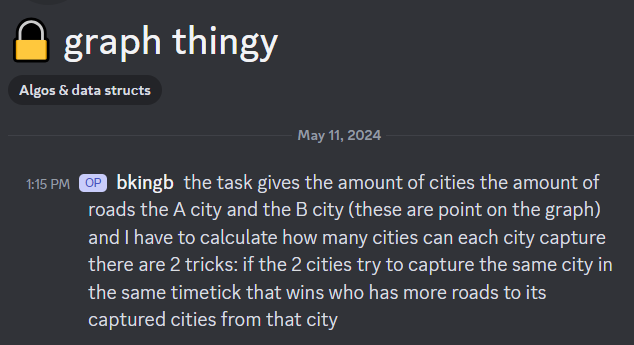

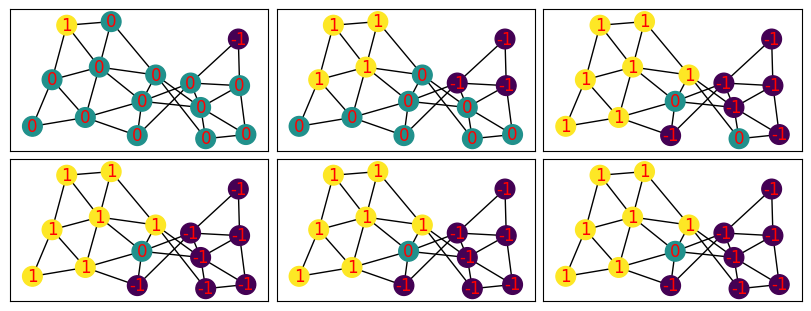

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.triangular_lattice_graph(4,4)
num_nodes = len(G.nodes)
# set ID for all nodes, all except two are 0s. one city: 1, other city:-1
IDs = [0]*num_nodes
IDs[0] = -1
IDs[-1] = 1
ID_dict     = {n:i for n,i in zip(G.nodes(),IDs)}
fig, ax = plt.subplots(2,3, figsize = (8,3), layout='constrained')
ax = ax.flatten()
np.random.seed(69) # to draw nodes in same place
nx.draw_networkx(G, with_labels=True, labels = ID_dict, node_color = IDs, ax = ax[0], node_size = 200, font_color= 'r')


adj = nx.adjacency_matrix(G)    # matrix that holds neighbors
adj += + np.eye(*adj.shape)     # self-connection

for i in range(5):
    np.random.seed(69)
    IDs = np.clip(adj @ IDs, -1, 1) # accumulate IDs from your neighbors
    ID_dict     = {n:int(i) for n,i in zip(G.nodes(),IDs)}
    nx.draw_networkx(G, with_labels=True, labels = ID_dict, node_color = IDs, ax = ax[i + 1], node_size = 200, font_color= 'r')